In [1]:
from __future__ import print_function
import ROOT
from larcv import larcv
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Welcome to JupyROOT 6.12/04


In [2]:
_files = ['output_infill.root']

In [3]:
_f = ROOT.TFile(_files[0])

In [4]:
_f.ls()

TFile**		output_infill.root	
 TFile*		output_infill.root	
  KEY: TTree	image2d_ADCMasked_tree;1	ADCMasked tree
  KEY: TTree	image2d_ADC_tree;1	ADC tree
  KEY: TTree	image2d_LabelsBasic_tree;1	LabelsBasic tree
  KEY: TTree	image2d_out_tree;1	out tree
  KEY: TTree	image2d_acc_tree;1	acc tree


In [5]:
image2d_adc_chain = ROOT.TChain("image2d_ADC_tree")
image2d_adcmasked_chain = ROOT.TChain("image2d_ADCMasked_tree")
image2d_labelsbasic_chain = ROOT.TChain("image2d_LabelsBasic_tree")
image2d_out_chain = ROOT.TChain("image2d_out_tree")
image2d_acc_chain = ROOT.TChain("image2d_acc_tree")

In [6]:
for _file in _files: image2d_adc_chain.AddFile(_file)
print ('Found', image2d_adc_chain.GetEntries(), 'entries in image2d adc')

for _file in _files: image2d_adcmasked_chain.AddFile(_file)
print ('Found', image2d_adcmasked_chain.GetEntries(), 'entries in image2d adcmasked')

for _file in _files: image2d_labelsbasic_chain.AddFile(_file)
print ('Found', image2d_labelsbasic_chain.GetEntries(), 'entries in image2d labelsbasic')

for _file in _files: image2d_out_chain.AddFile(_file)
print ('Found', image2d_out_chain.GetEntries(), 'entries in image2d out')

for _file in _files: image2d_acc_chain.AddFile(_file)
print ('Found', image2d_acc_chain.GetEntries(), 'entries in image2d acc')

Found 10 entries in image2d adc
Found 10 entries in image2d adcmasked
Found 10 entries in image2d labelsbasic
Found 10 entries in image2d out
Found 10 entries in image2d acc


Data type: <ROOT.larcv::EventImage2D object at 0xb0468a0>
Type of image2dadc_array: <class 'ROOT.vector<larcv::Image2D>'>
Number of images: 1
Data type: <ROOT.larcv::EventImage2D object at 0xb4c8b50>
Type of image2dadcmasked_array: <class 'ROOT.vector<larcv::Image2D>'>
Number of images: 1
Data type: <ROOT.larcv::EventImage2D object at 0xb705790>
Type of image2dlabelsbasic_array: <class 'ROOT.vector<larcv::Image2D>'>
Number of images: 1
Data type: <ROOT.larcv::EventImage2D object at 0xb6e1620>
Type of image2dout_array: <class 'ROOT.vector<larcv::Image2D>'>
Number of images: 1
Data type: <ROOT.larcv::EventImage2D object at 0xb70a610>
Type of image2dacc_array: <class 'ROOT.vector<larcv::Image2D>'>
Number of images: 1
Image index 0
image_numpyadc has type <type 'numpy.ndarray'>
Image dimensions are (512, 832)


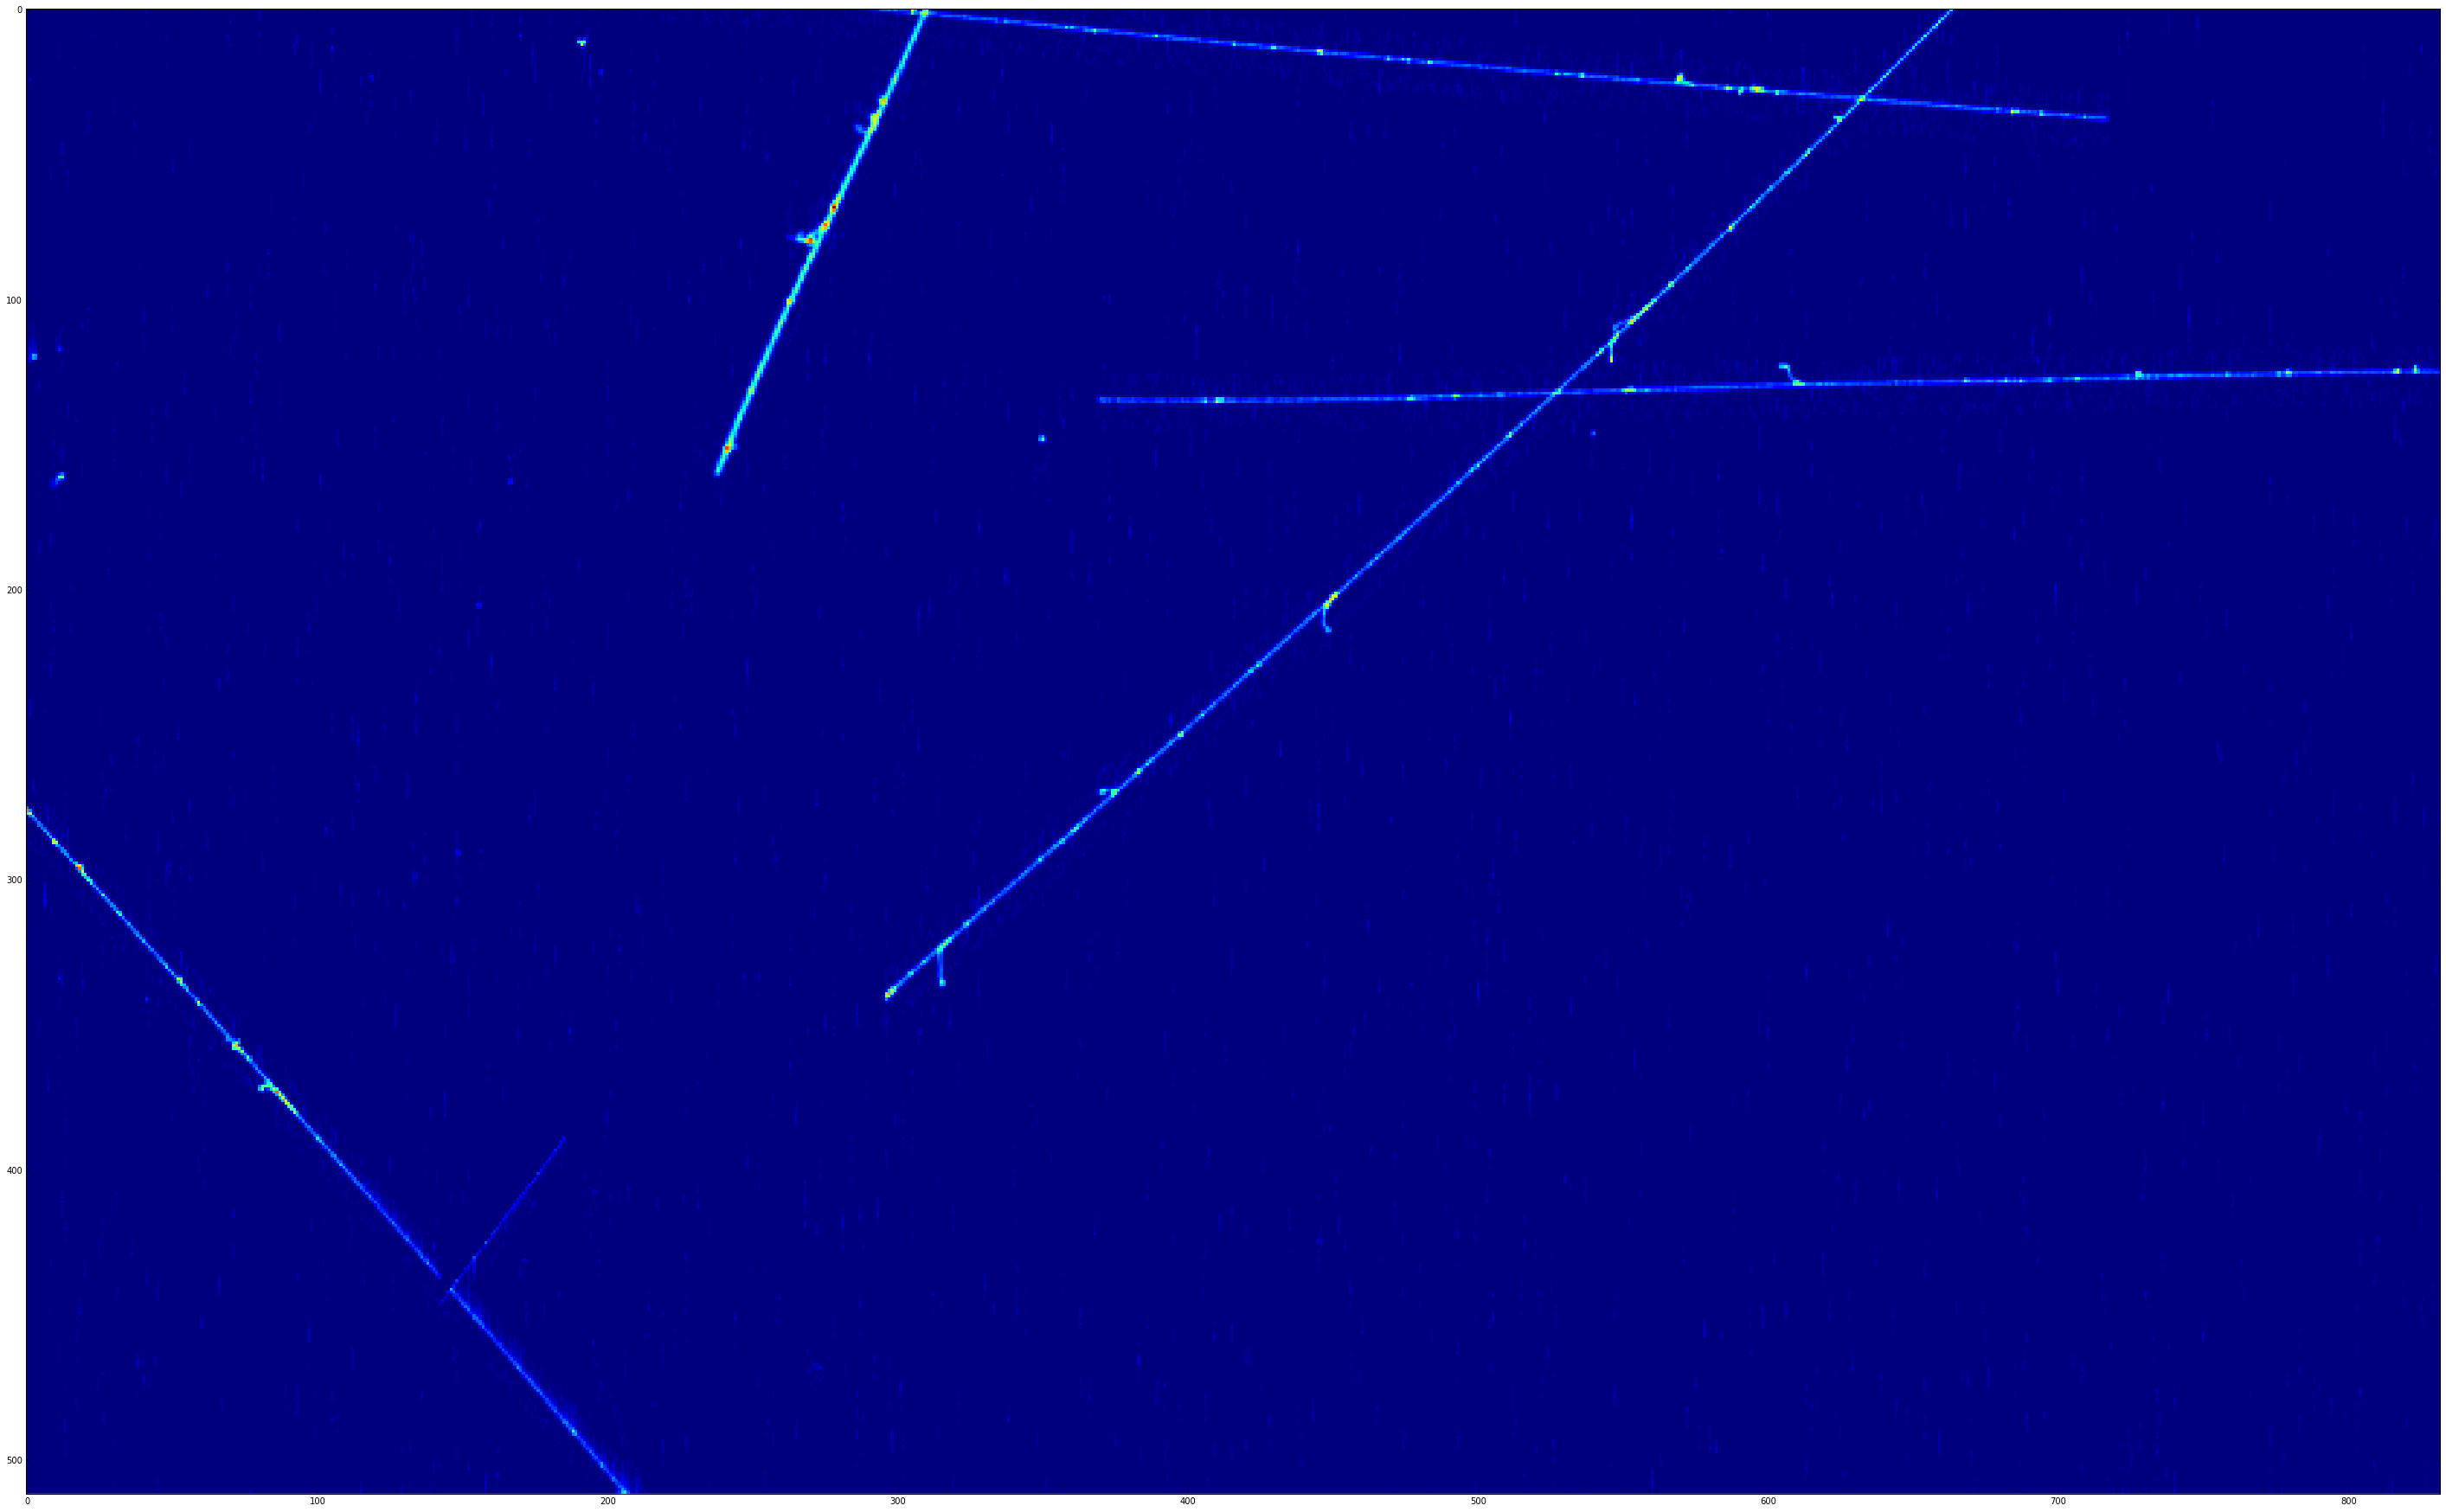

Image index 0
image_numpyadcmasked has type <type 'numpy.ndarray'>
Image dimensions are (512, 832)


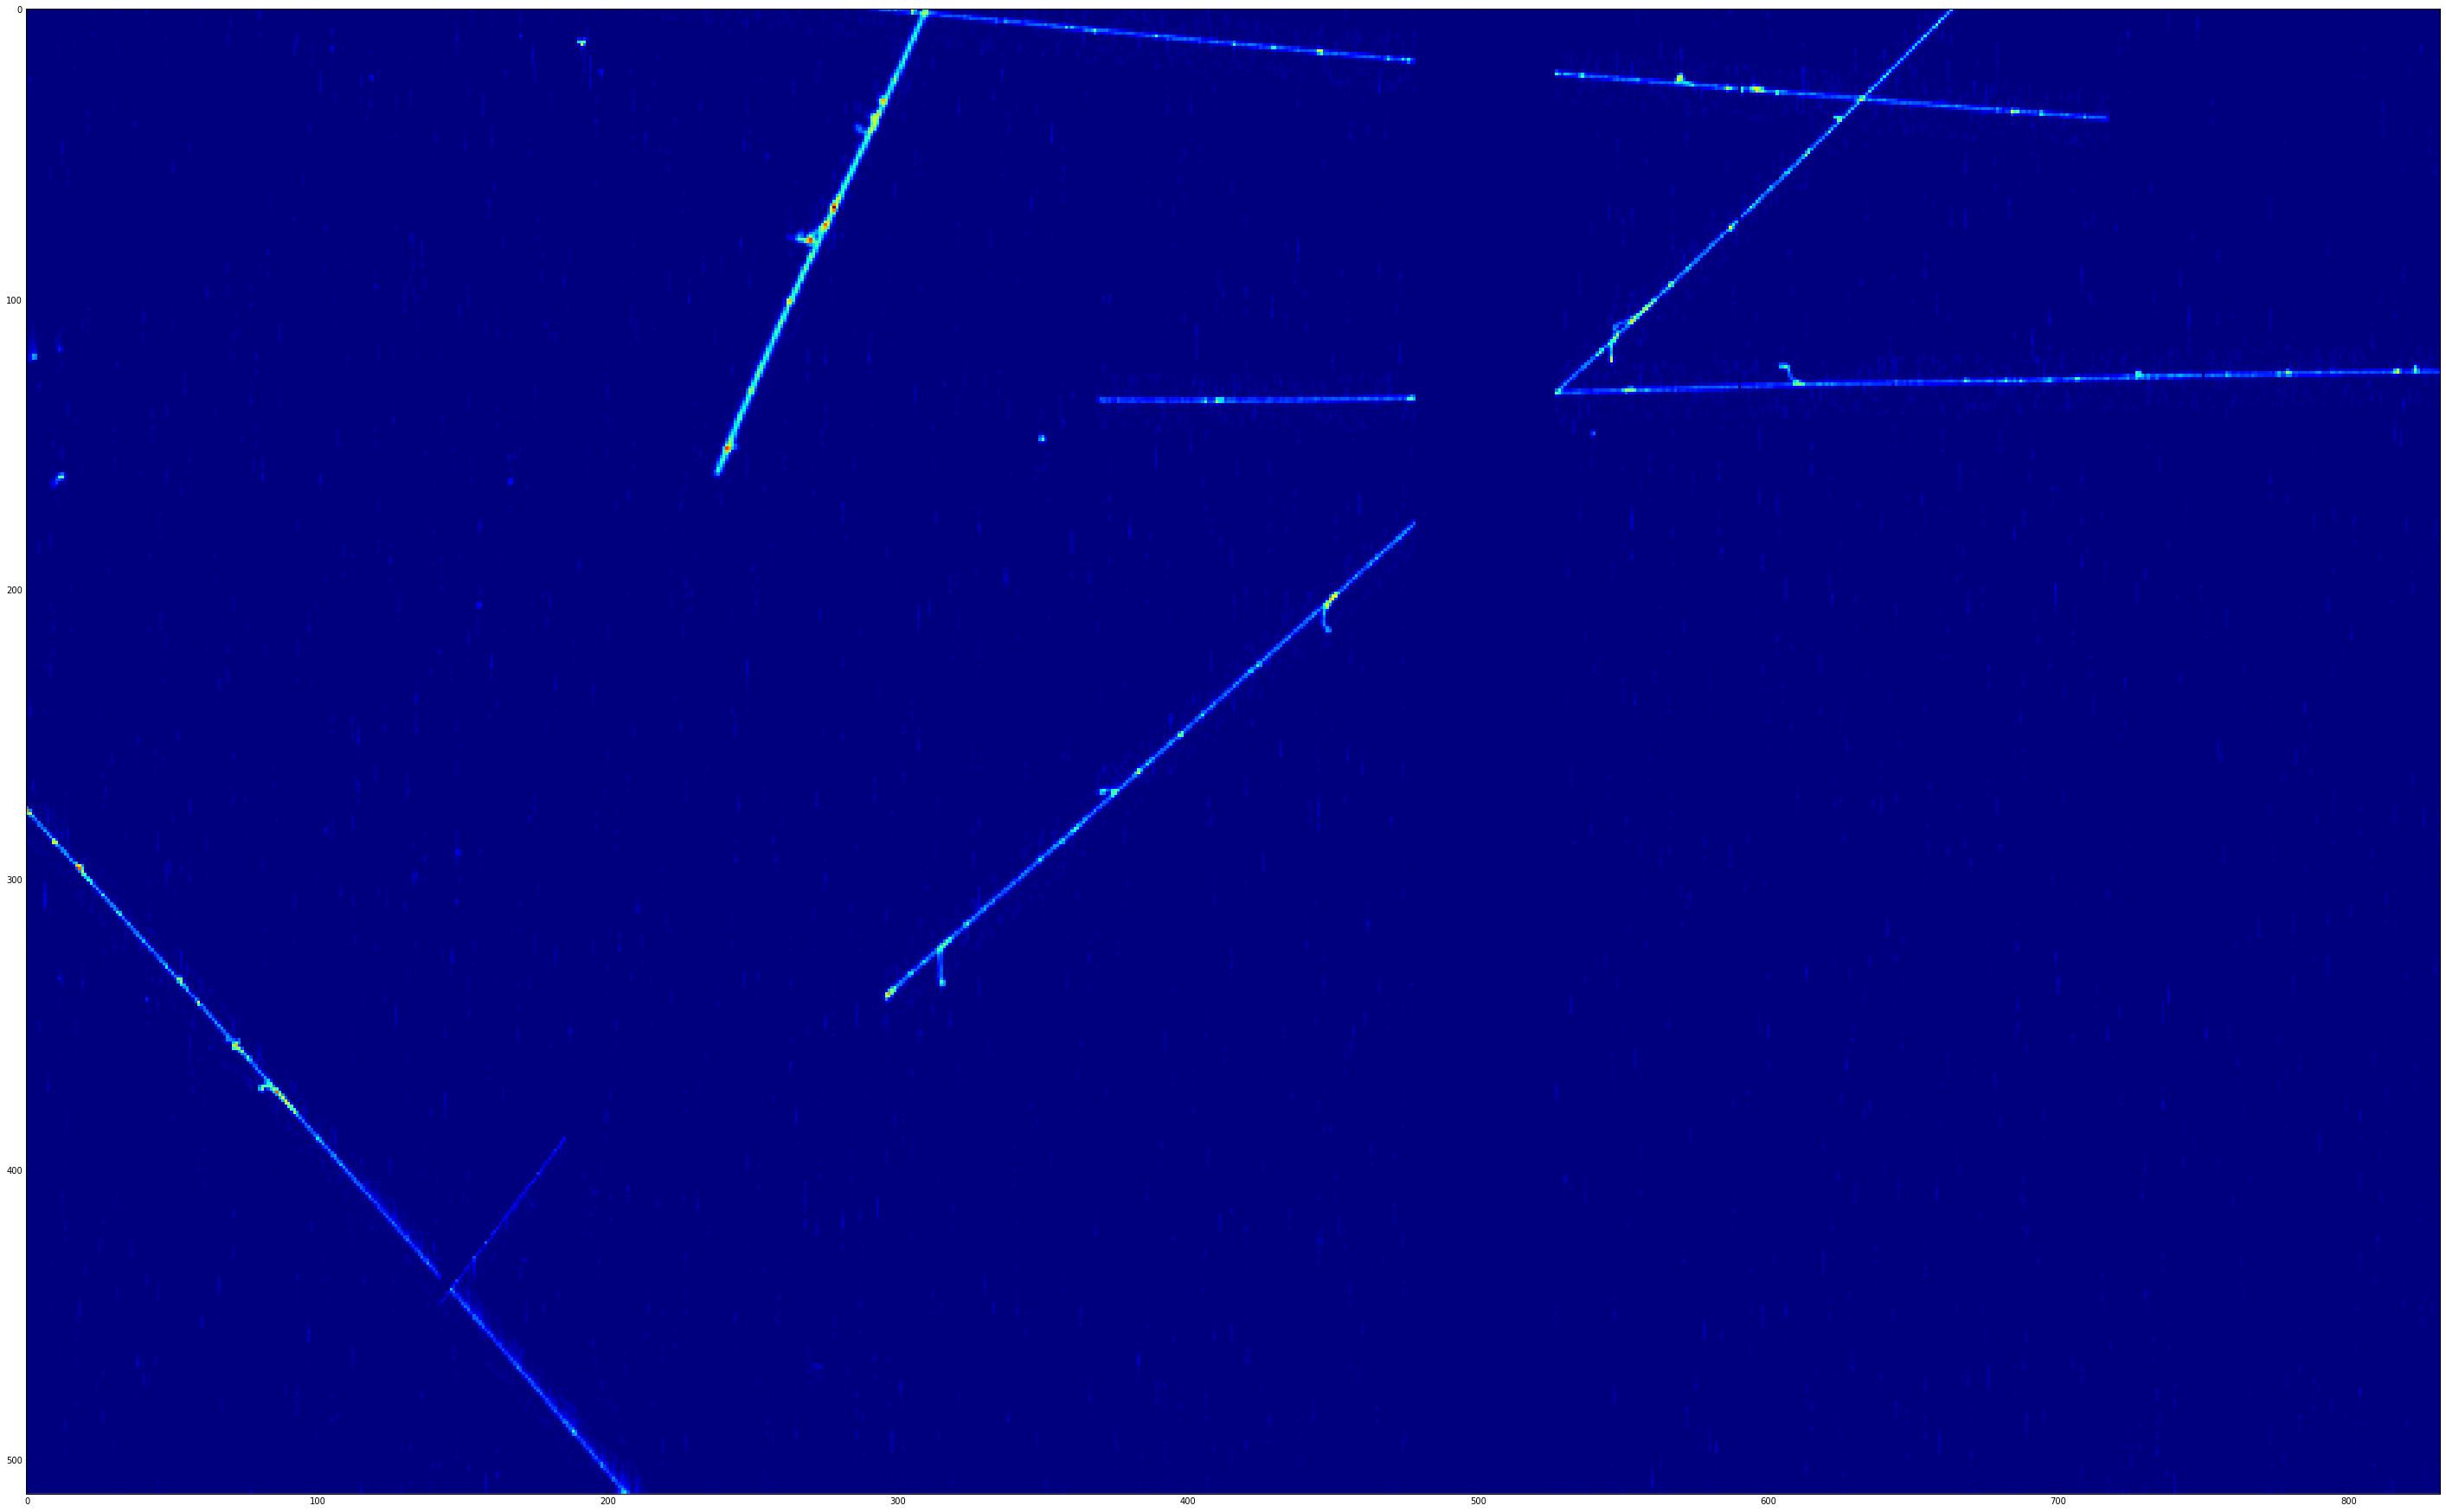

Image index 0
image_numpylabelsbasic has type <type 'numpy.ndarray'>
Image dimensions are (512, 832)


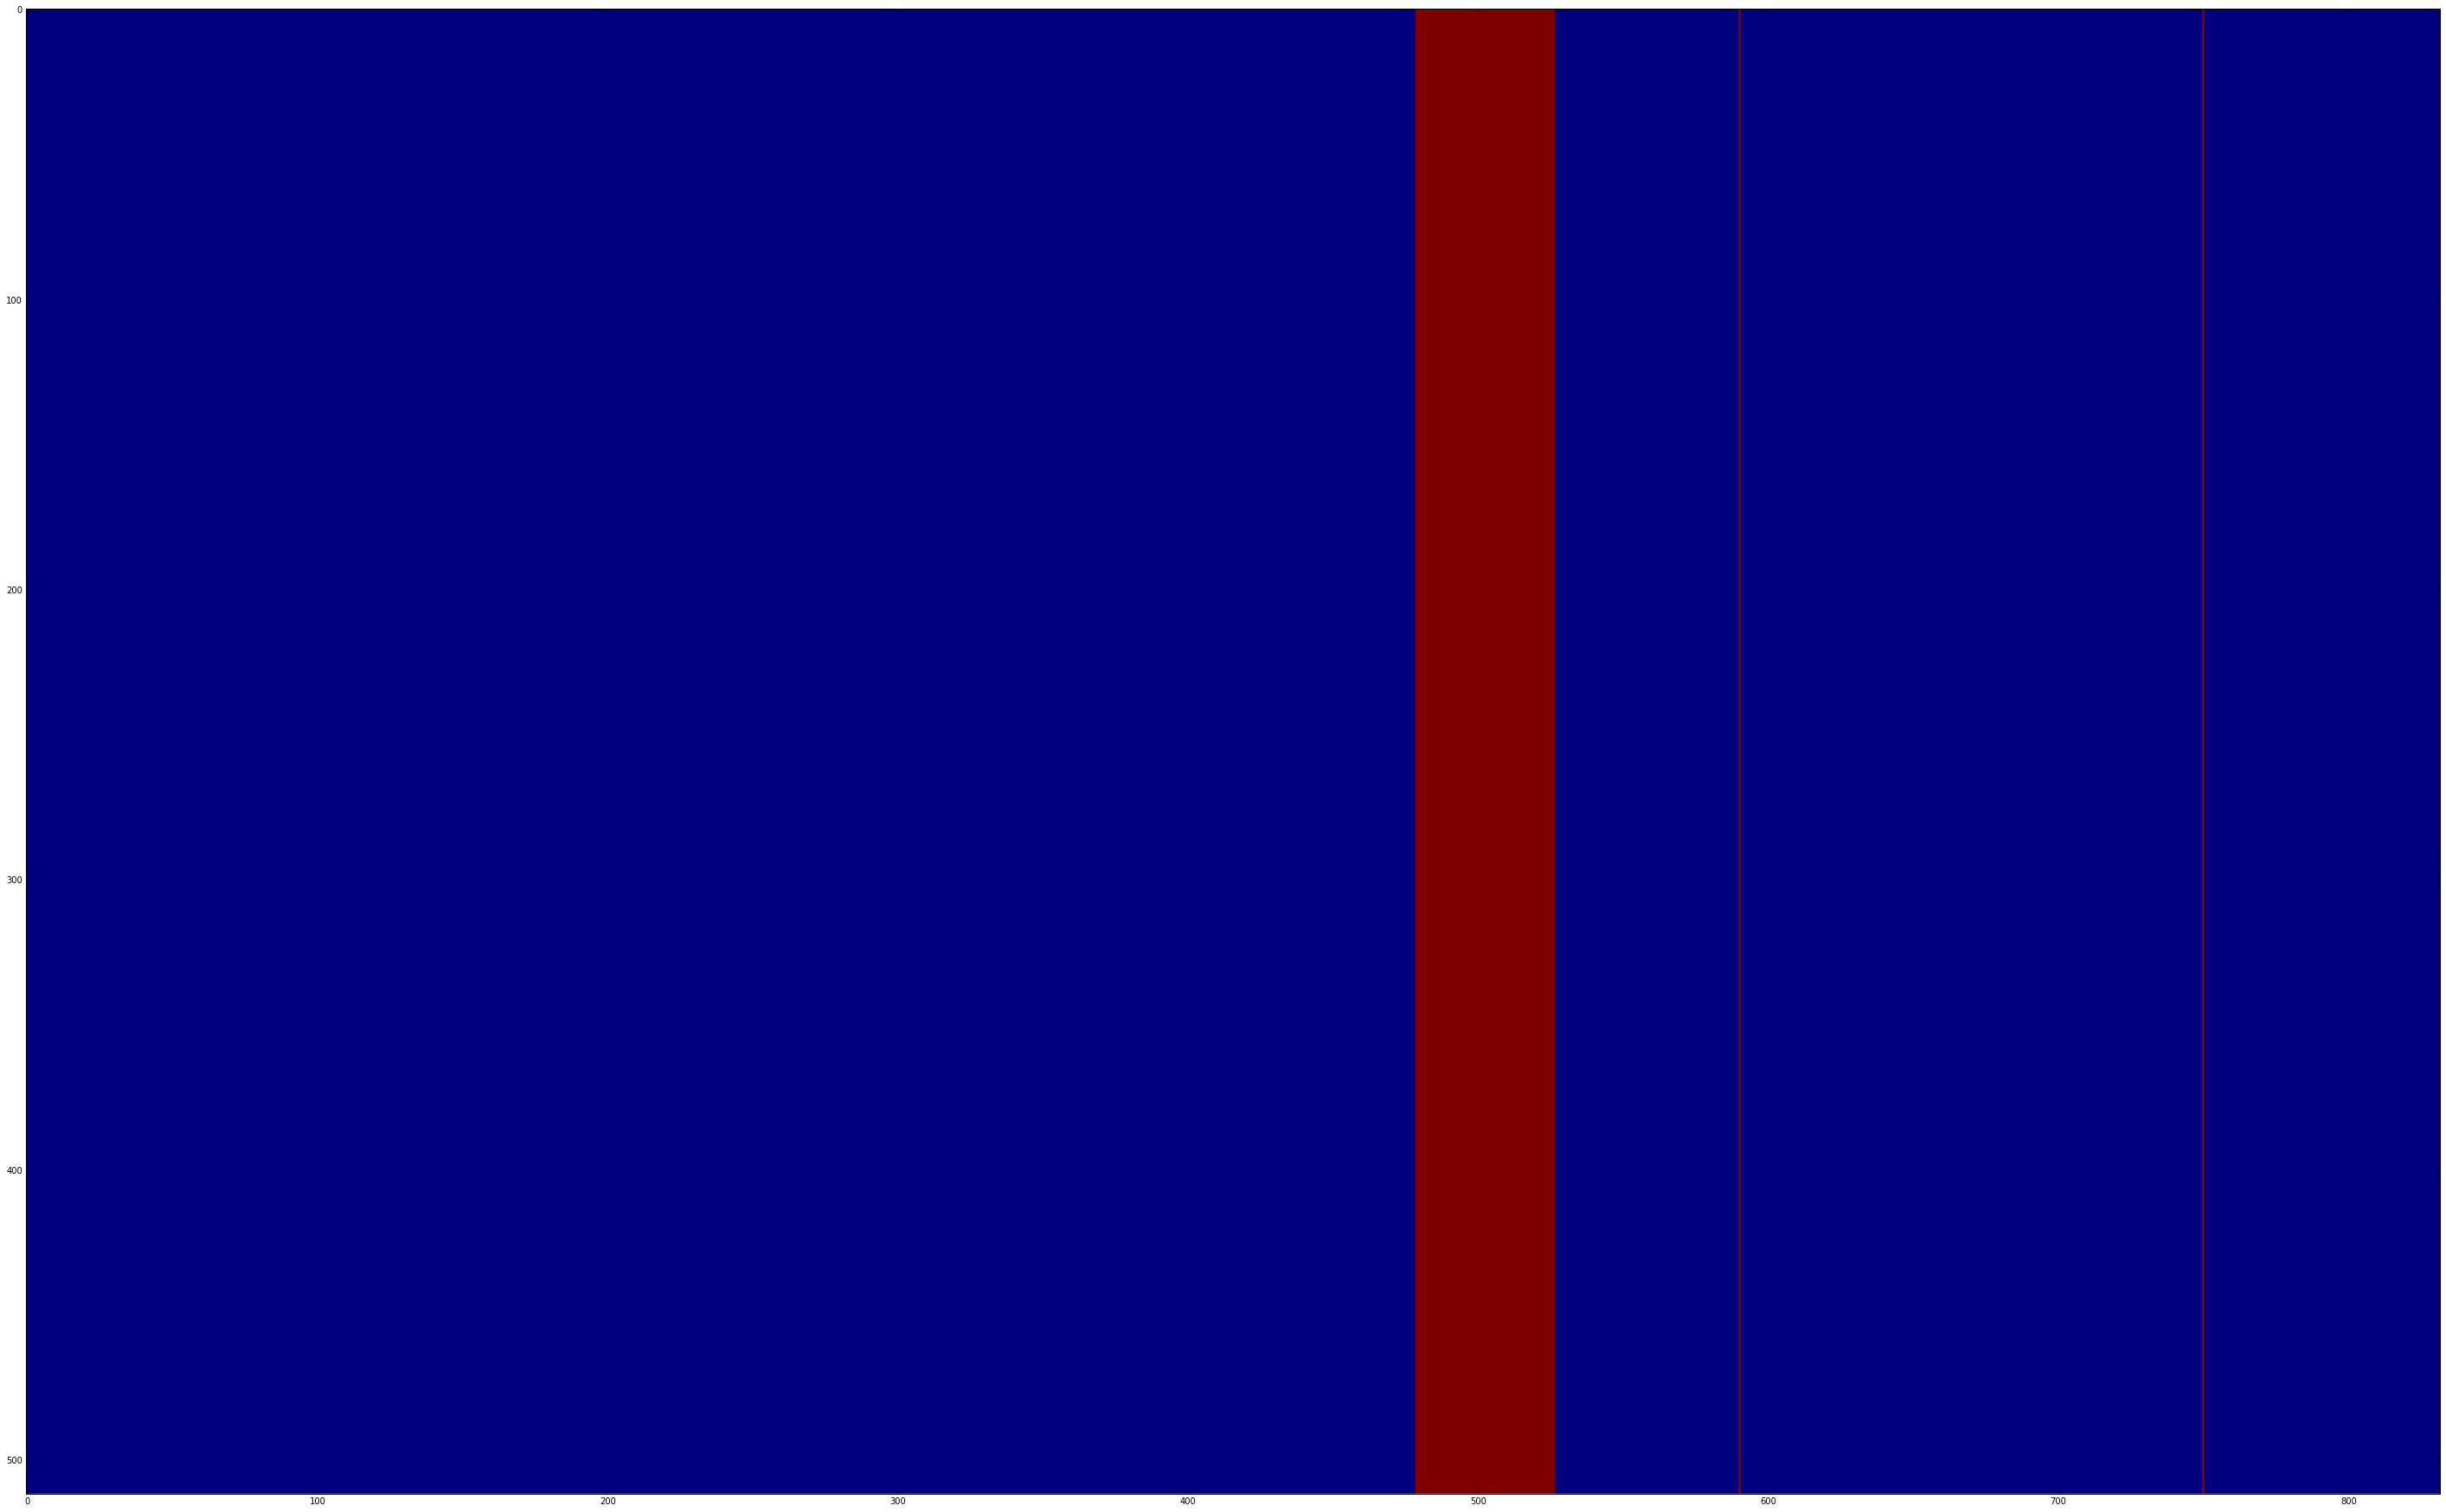

Image index 0
image_numpyout has type <type 'numpy.ndarray'>
Image dimensions are (512, 832)


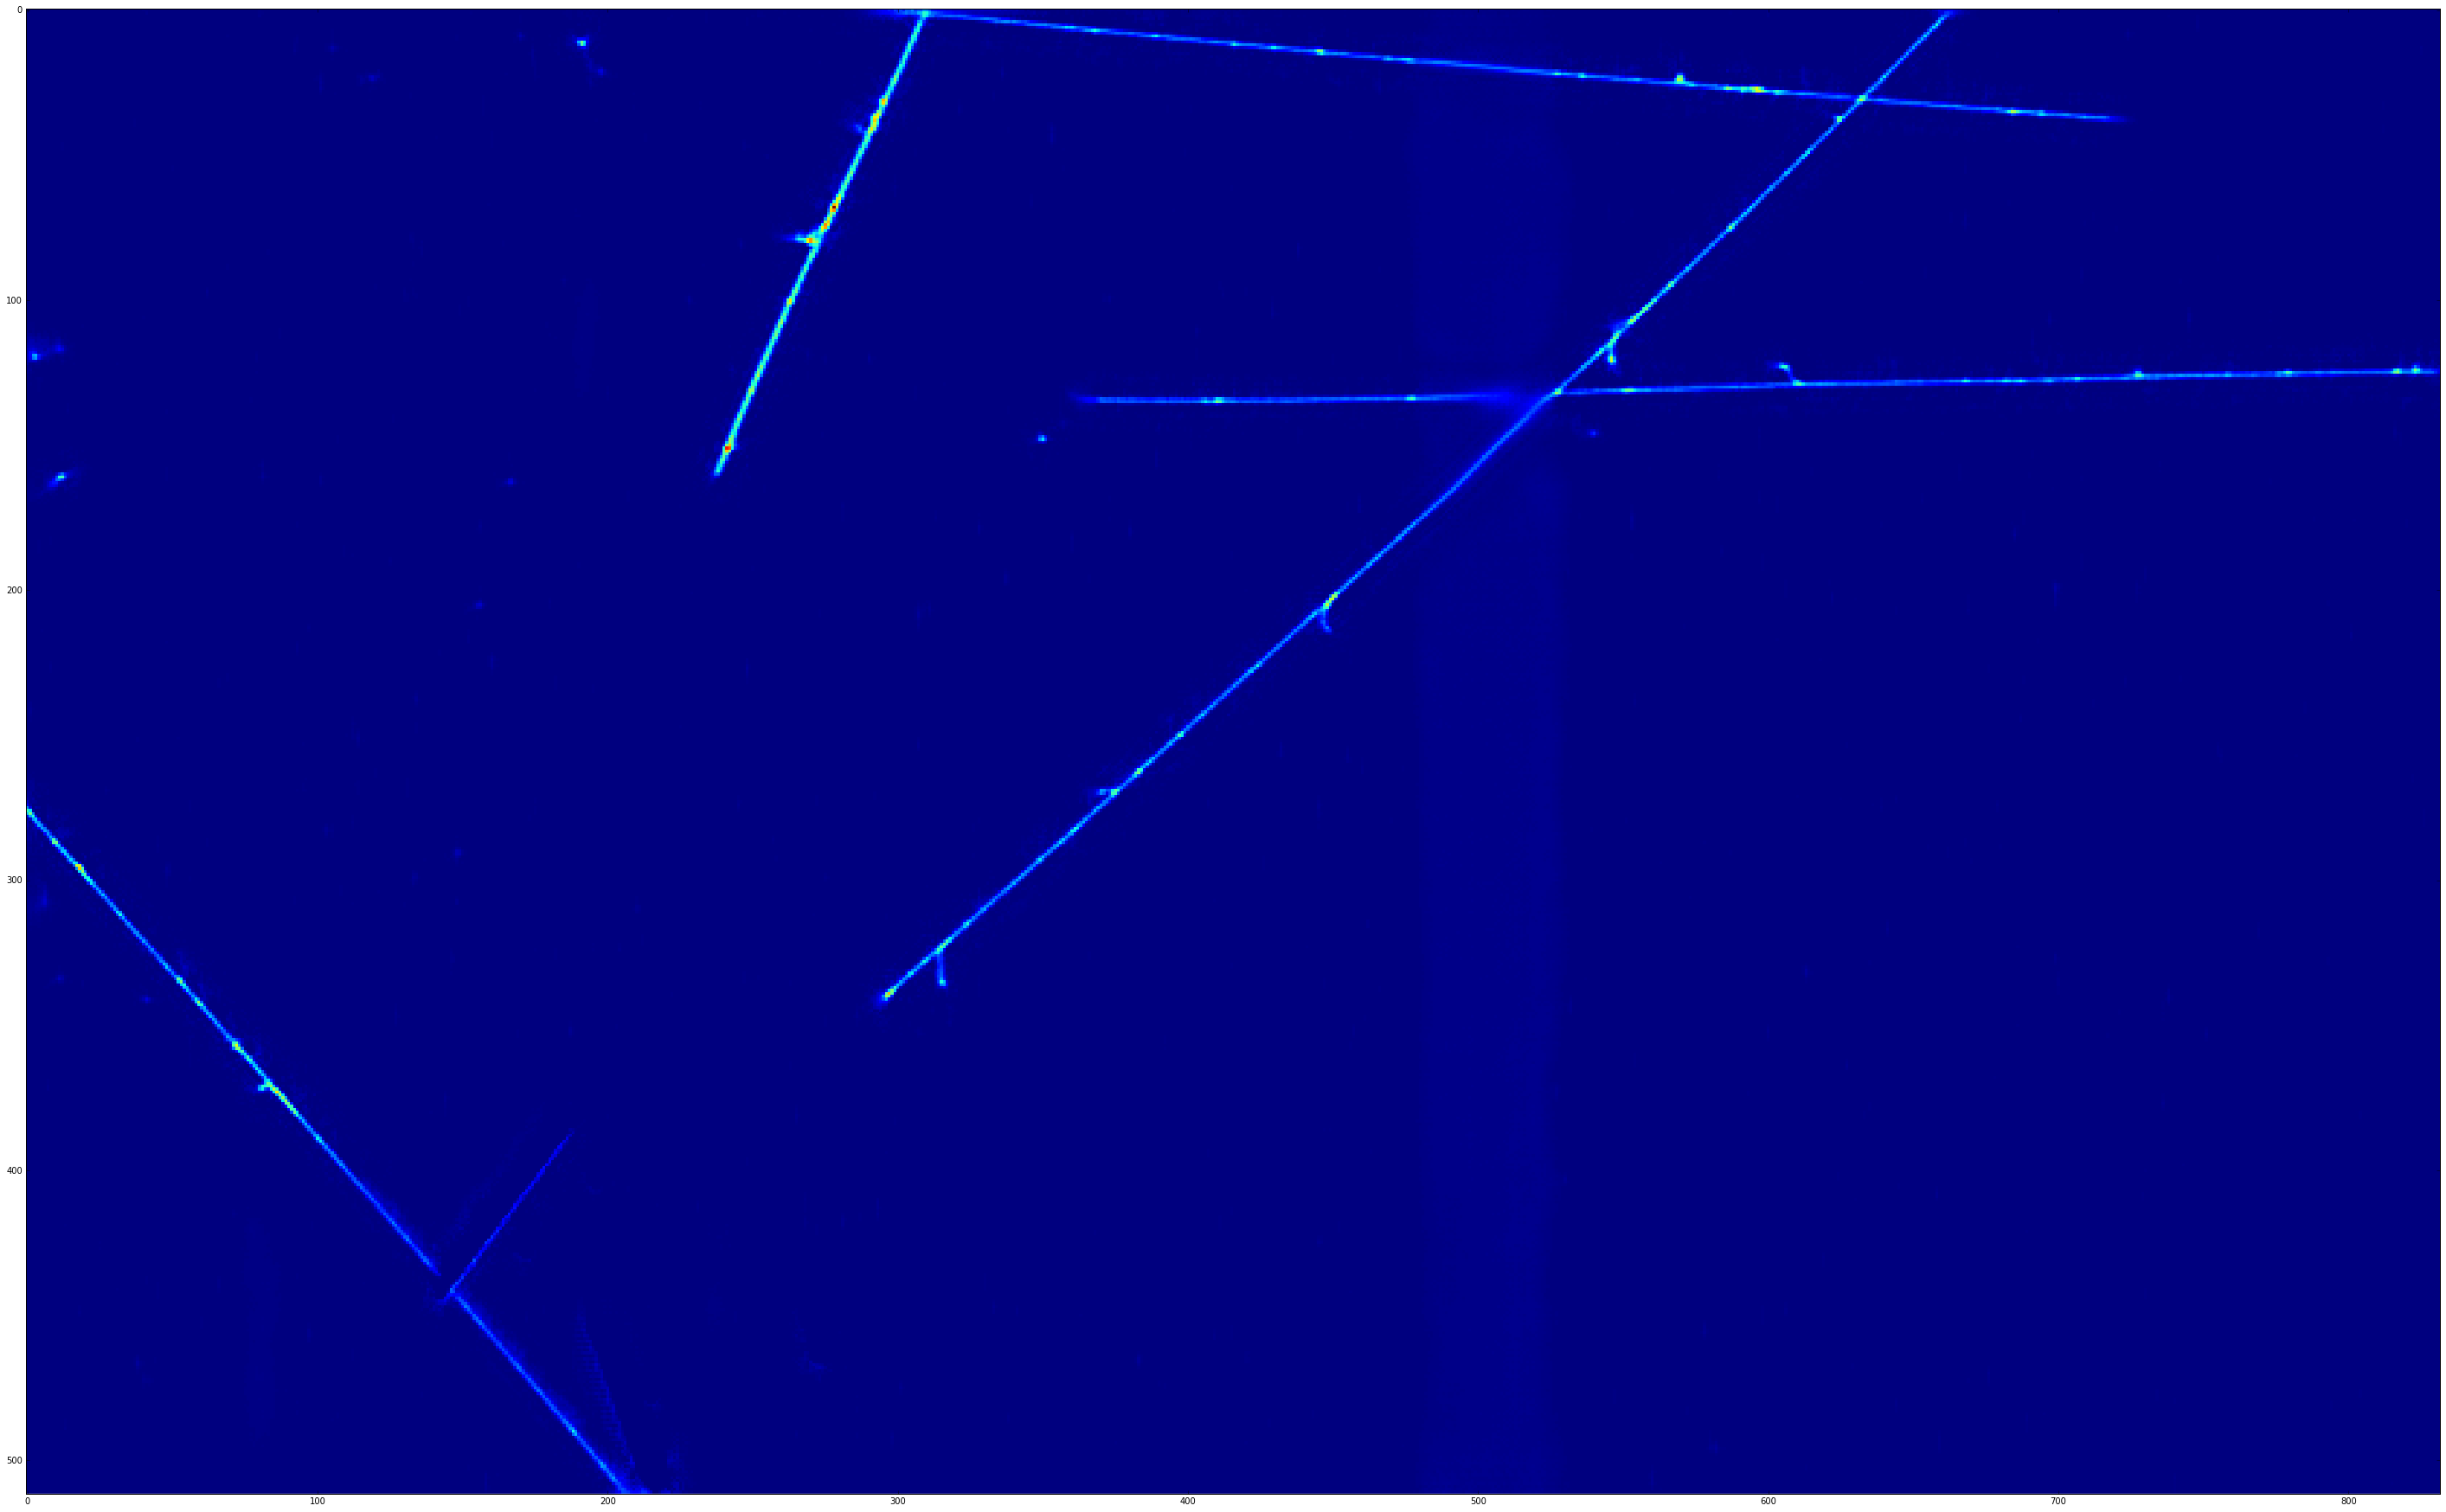

Image index 0
image_numpyacc has type <type 'numpy.ndarray'>
Image dimensions are (512, 832)


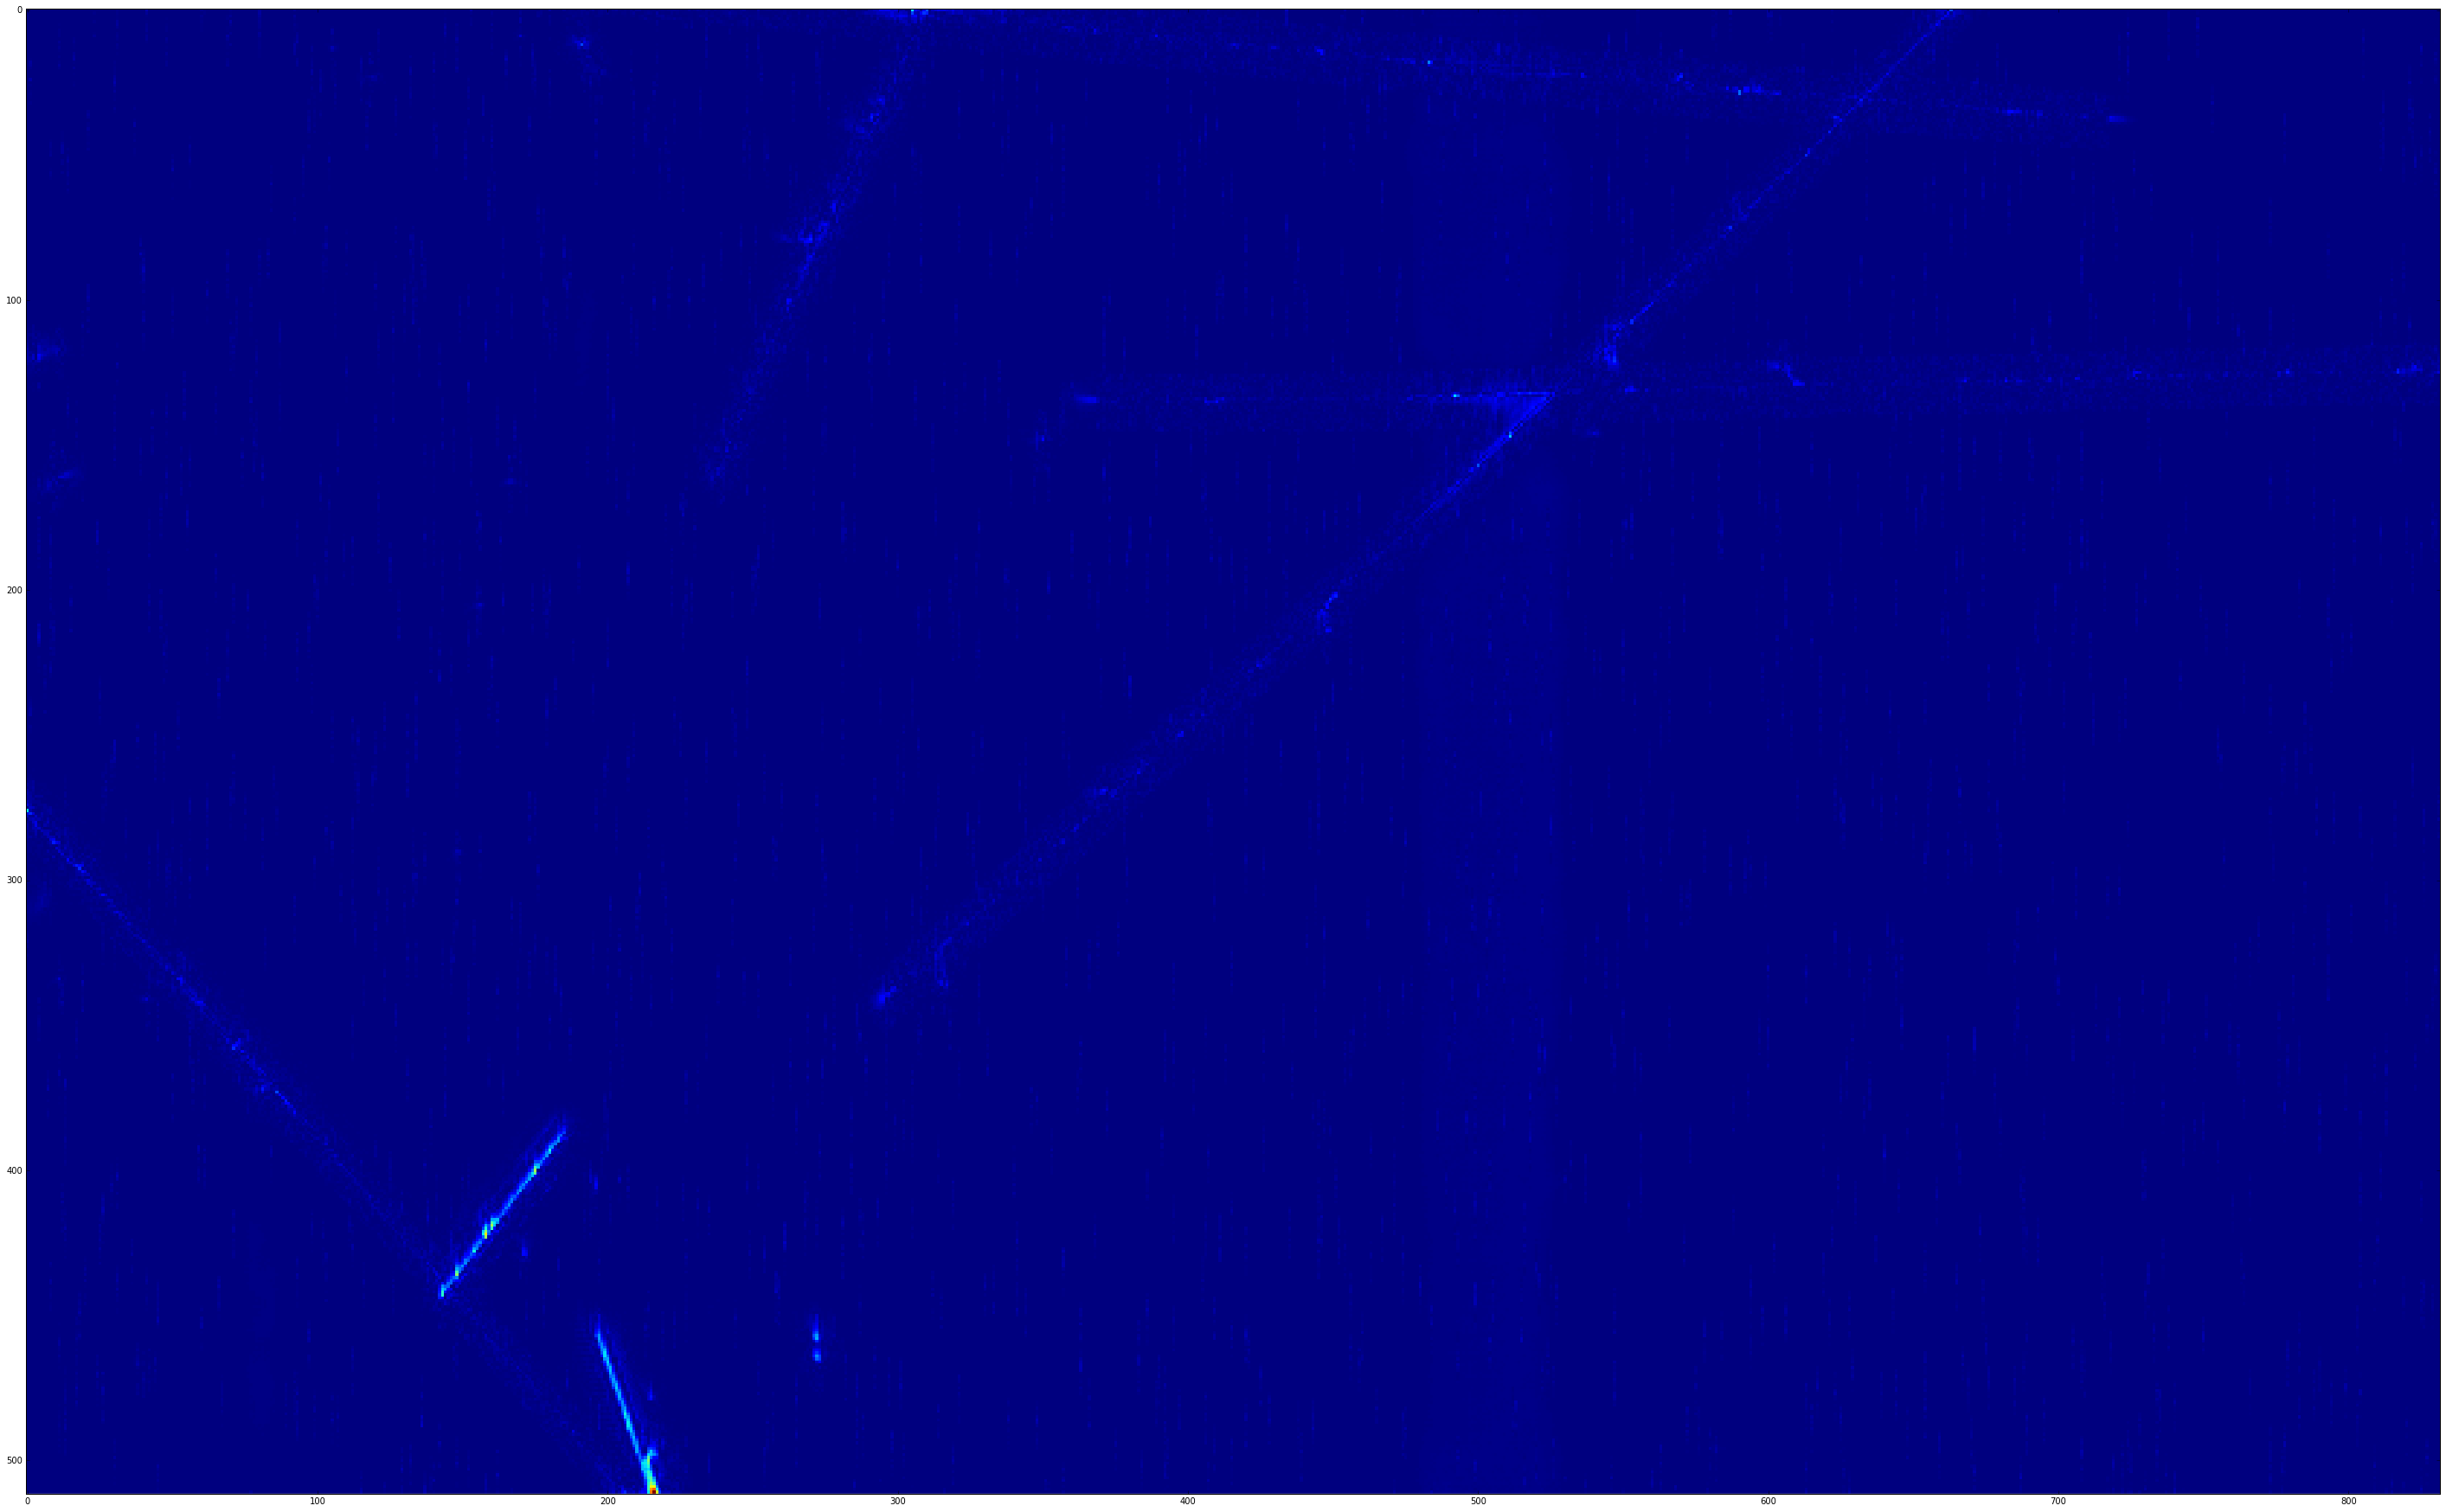

In [8]:
for i in range(1):
    entry=i
    
    image2d_adc_chain.GetEntry(entry)
    entry_image2dadc_data = image2d_adc_chain.image2d_ADC_branch
    print('Data type:', entry_image2dadc_data)
    image2dadc_array = entry_image2dadc_data.as_vector()
    print('Type of image2dadc_array:', type(image2dadc_array))
    print('Number of images:', image2dadc_array.size())
    
    image2d_adcmasked_chain.GetEntry(entry)
    entry_image2dadcmasked_data = image2d_adcmasked_chain.image2d_ADCMasked_branch
    print('Data type:', entry_image2dadcmasked_data)
    image2dadcmasked_array = entry_image2dadcmasked_data.as_vector()
    print('Type of image2dadcmasked_array:', type(image2dadcmasked_array))
    print('Number of images:', image2dadcmasked_array.size())
    
    image2d_labelsbasic_chain.GetEntry(entry)
    entry_image2dlabelsbasic_data = image2d_labelsbasic_chain.image2d_LabelsBasic_branch
    print('Data type:', entry_image2dlabelsbasic_data)
    image2dlabelsbasic_array = entry_image2dlabelsbasic_data.as_vector()
    print('Type of image2dlabelsbasic_array:', type(image2dlabelsbasic_array))
    print('Number of images:', image2dlabelsbasic_array.size())
    
    image2d_out_chain.GetEntry(entry)
    entry_image2dout_data = image2d_out_chain.image2d_out_branch
    print('Data type:', entry_image2dout_data)
    image2dout_array = entry_image2dout_data.as_vector()
    print('Type of image2dout_array:', type(image2dout_array))
    print('Number of images:', image2dout_array.size())
    
    image2d_acc_chain.GetEntry(entry)
    entry_image2dacc_data = image2d_acc_chain.image2d_acc_branch
    print('Data type:', entry_image2dacc_data)
    image2dacc_array = entry_image2dacc_data.as_vector()
    print('Type of image2dacc_array:', type(image2dacc_array))
    print('Number of images:', image2dacc_array.size())
    
    size = 50
    
    for index, image in enumerate(image2dadc_array):
        image_numpyadc = larcv.as_ndarray(image)
        image_numpyadc[image_numpyadc < 0] = 0
        #image_numpyadc[image_numpyadc > 1] = 1
        print("Image index", index)
        print("image_numpyadc has type {}".format(type(image_numpyadc)))
        print("Image dimensions are {}".format(image_numpyadc.shape))
        fig = plt.figure(figsize=(size,size)) 
        plt.imshow(image_numpyadc, interpolation='none',cmap='jet')
        plt.show()
        
    for index, image in enumerate(image2dadcmasked_array):
        image_numpyadcmasked = larcv.as_ndarray(image)
        image_numpyadcmasked[image_numpyadcmasked < 0] = 0
        #image_numpyadc[image_numpyadc > 1] = 1
        print("Image index", index)
        print("image_numpyadcmasked has type {}".format(type(image_numpyadcmasked)))
        print("Image dimensions are {}".format(image_numpyadcmasked.shape))
        fig = plt.figure(figsize=(size,size))
        plt.imshow(image_numpyadcmasked, interpolation='none',cmap='jet')
        plt.show()
    
    for index, image in enumerate(image2dlabelsbasic_array):
        image_numpylabelsbasic = larcv.as_ndarray(image)
        print("Image index", index)
        print("image_numpylabelsbasic has type {}".format(type(image_numpylabelsbasic)))
        print("Image dimensions are {}".format(image_numpylabelsbasic.shape))
        fig = plt.figure(figsize=(size,size))
        plt.imshow(image_numpylabelsbasic, interpolation='none',cmap='jet')
        plt.show()
        
    for index, image in enumerate(image2dout_array):
        image_numpyout = larcv.as_ndarray(image)
        image_numpyout[image_numpyout < 0] = 0
        print("Image index", index)
        print("image_numpyout has type {}".format(type(image_numpyout)))
        print("Image dimensions are {}".format(image_numpyout.shape))
        fig = plt.figure(figsize=(size,size))
        plt.imshow(image_numpyout, interpolation='none',cmap='jet')
        plt.show()
        
    for index, image in enumerate(image2dacc_array):
        image_numpyacc = larcv.as_ndarray(image)
        image_numpyacc[image_numpyacc < 0] = 0
        print("Image index", index)
        print("image_numpyacc has type {}".format(type(image_numpyacc)))
        print("Image dimensions are {}".format(image_numpyacc.shape))
        fig = plt.figure(figsize=(size,size))
        plt.imshow(image_numpyacc, interpolation='none',cmap='jet')
        plt.show()

Found 20 entries in image2d adc
Found 20 entries in image2d adcmasked
Found 20 entries in image2d labelsbasic
Found 20 entries in image2d out
Found 20 entries in image2d acc
Data type: <ROOT.larcv::EventImage2D object at 0xdc1c620>
Type of image2dadc_array: <class 'ROOT.vector<larcv::Image2D>'>
Number of images: 1
Data type: <ROOT.larcv::EventImage2D object at 0x1e989190>
Type of image2dadcmasked_array: <class 'ROOT.vector<larcv::Image2D>'>
Number of images: 1
Data type: <ROOT.larcv::EventImage2D object at 0x22095b10>
Type of image2dlabelsbasic_array: <class 'ROOT.vector<larcv::Image2D>'>
Number of images: 1
Data type: <ROOT.larcv::EventImage2D object at 0x22057740>
Type of image2dout_array: <class 'ROOT.vector<larcv::Image2D>'>
Number of images: 1
Data type: <ROOT.larcv::EventImage2D object at 0xd31e800>
Type of image2dacc_array: <class 'ROOT.vector<larcv::Image2D>'>
Number of images: 1
Image index 0
image_numpyout has type <type 'numpy.ndarray'>
Image dimensions are (512, 832)


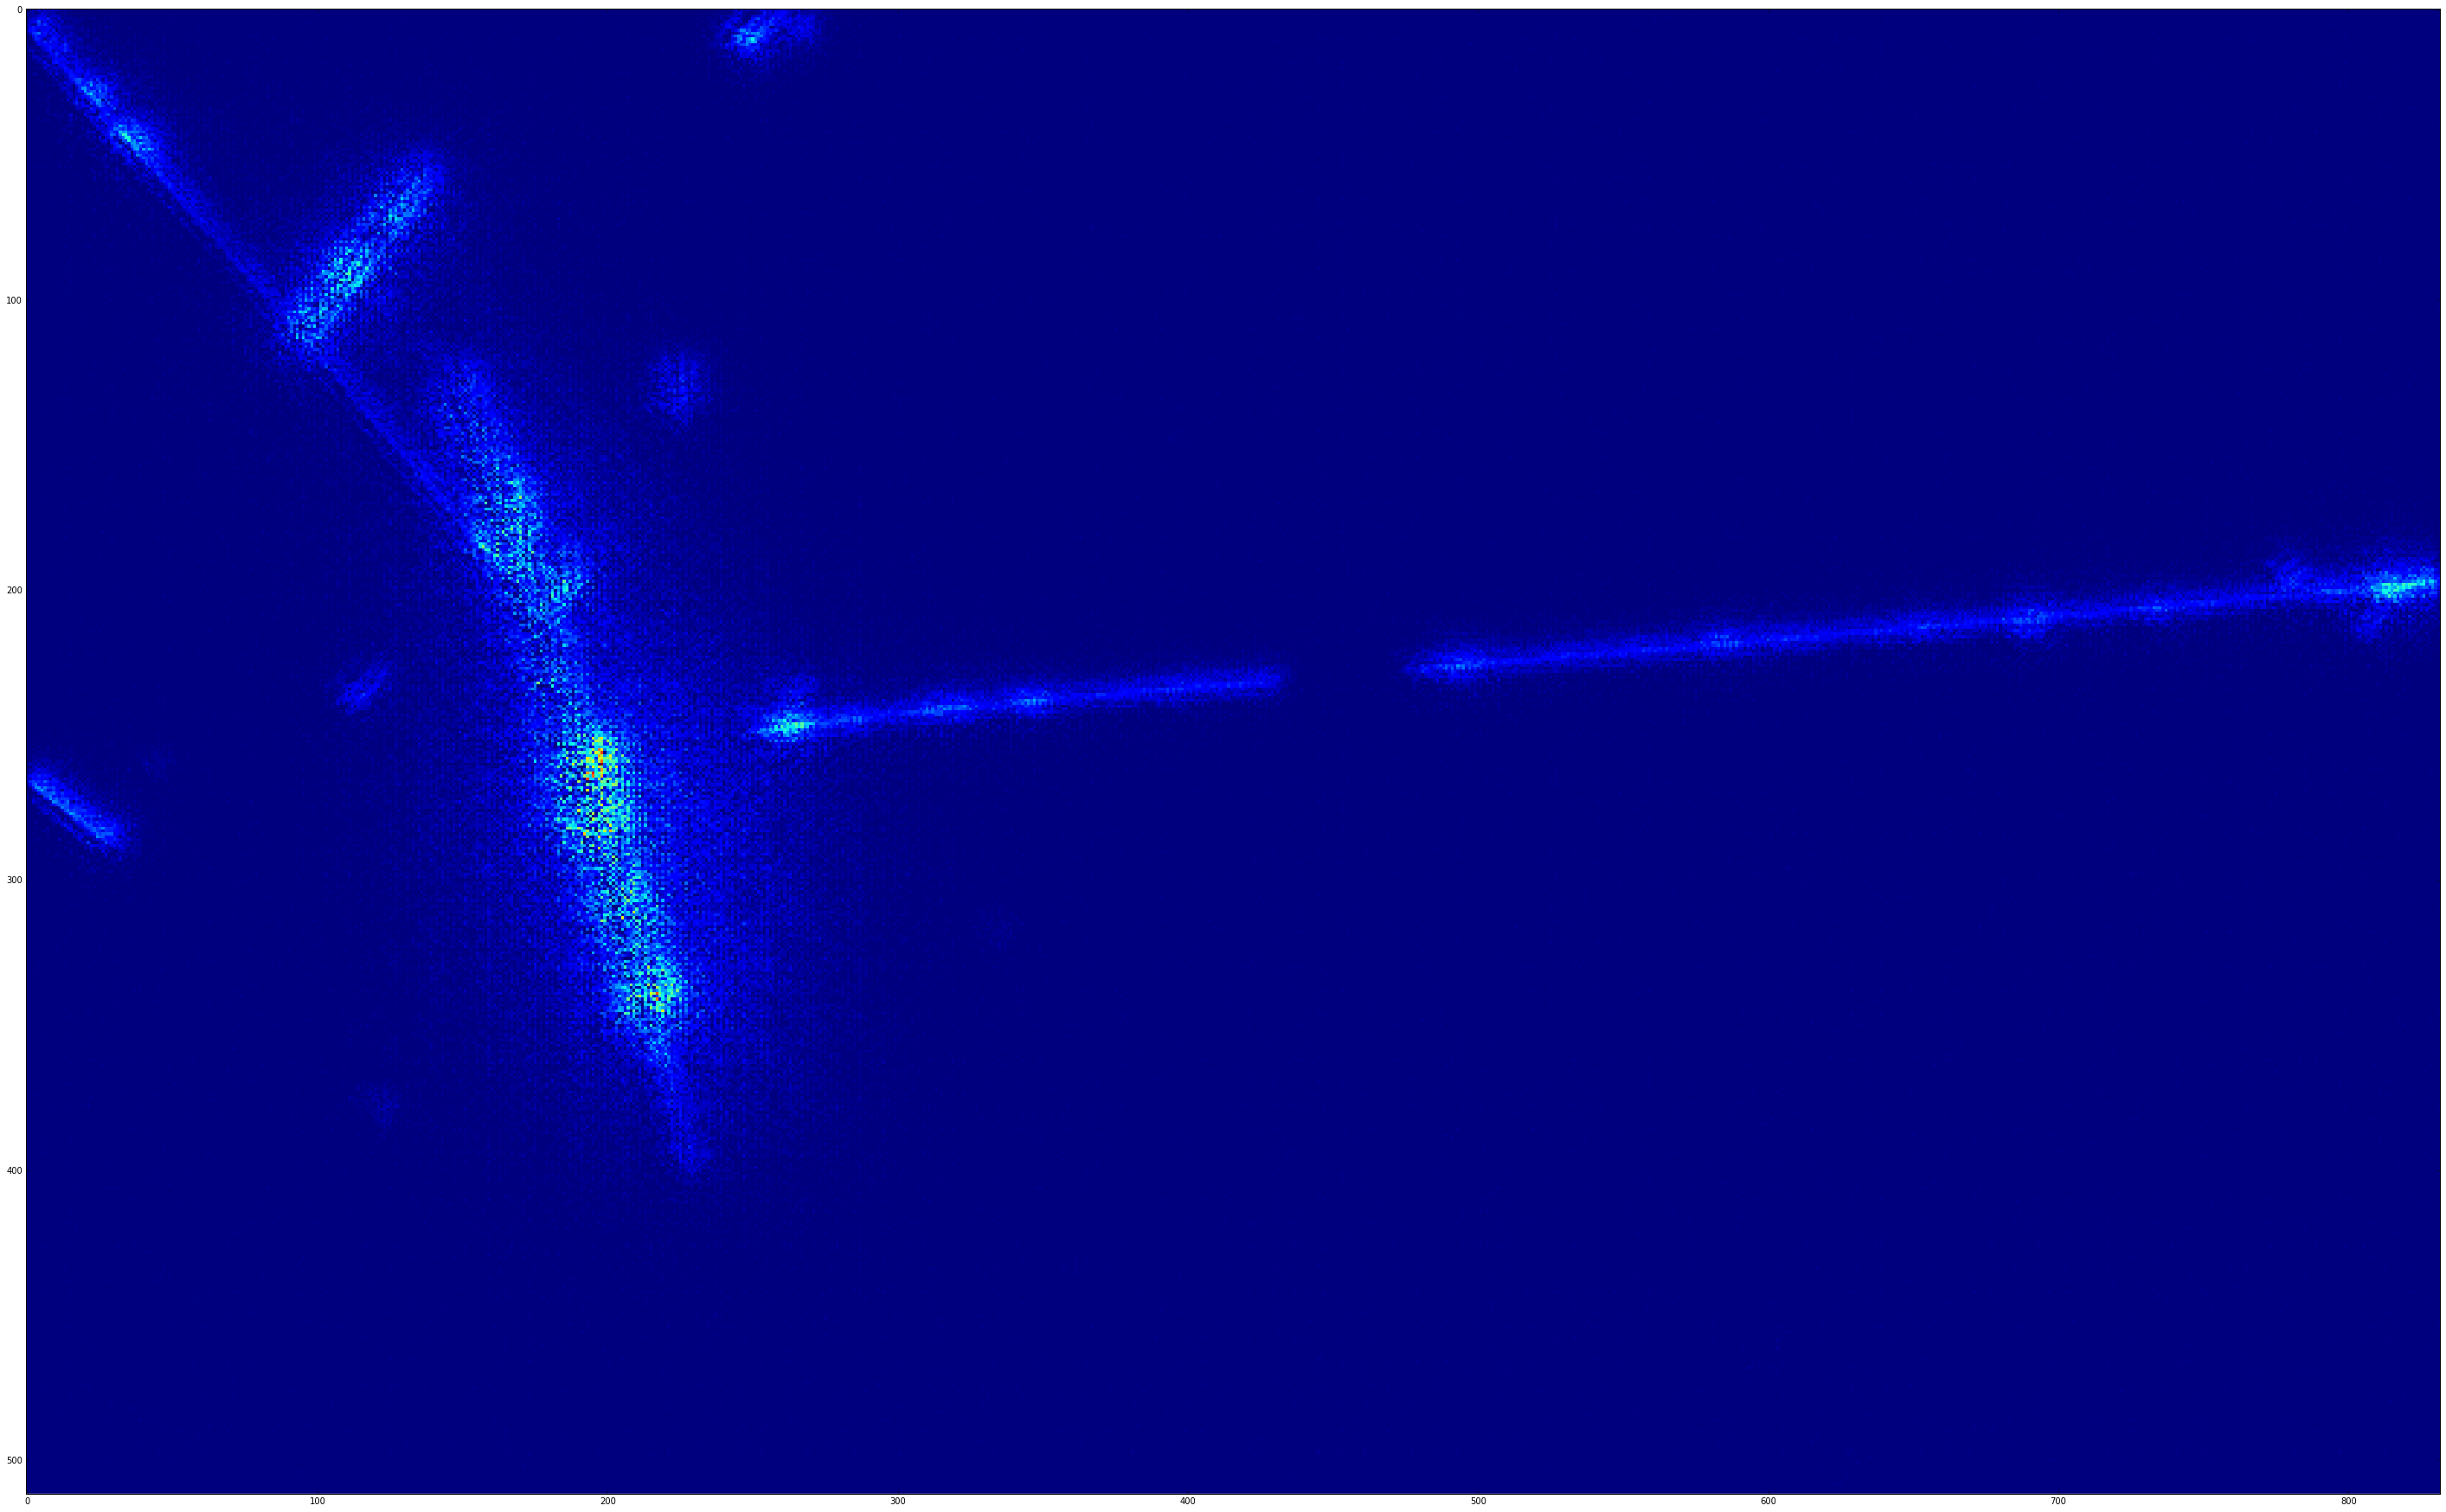

Data type: <ROOT.larcv::EventImage2D object at 0xc02c220>
Type of image2dadc_array: <class 'ROOT.vector<larcv::Image2D>'>
Number of images: 1
Data type: <ROOT.larcv::EventImage2D object at 0x2391e360>
Type of image2dadcmasked_array: <class 'ROOT.vector<larcv::Image2D>'>
Number of images: 1
Data type: <ROOT.larcv::EventImage2D object at 0xcb15170>
Type of image2dlabelsbasic_array: <class 'ROOT.vector<larcv::Image2D>'>
Number of images: 1
Data type: <ROOT.larcv::EventImage2D object at 0xd679e00>
Type of image2dout_array: <class 'ROOT.vector<larcv::Image2D>'>
Number of images: 1
Data type: <ROOT.larcv::EventImage2D object at 0xcab8ef0>
Type of image2dacc_array: <class 'ROOT.vector<larcv::Image2D>'>
Number of images: 1
Image index 0
image_numpyout has type <type 'numpy.ndarray'>
Image dimensions are (512, 832)


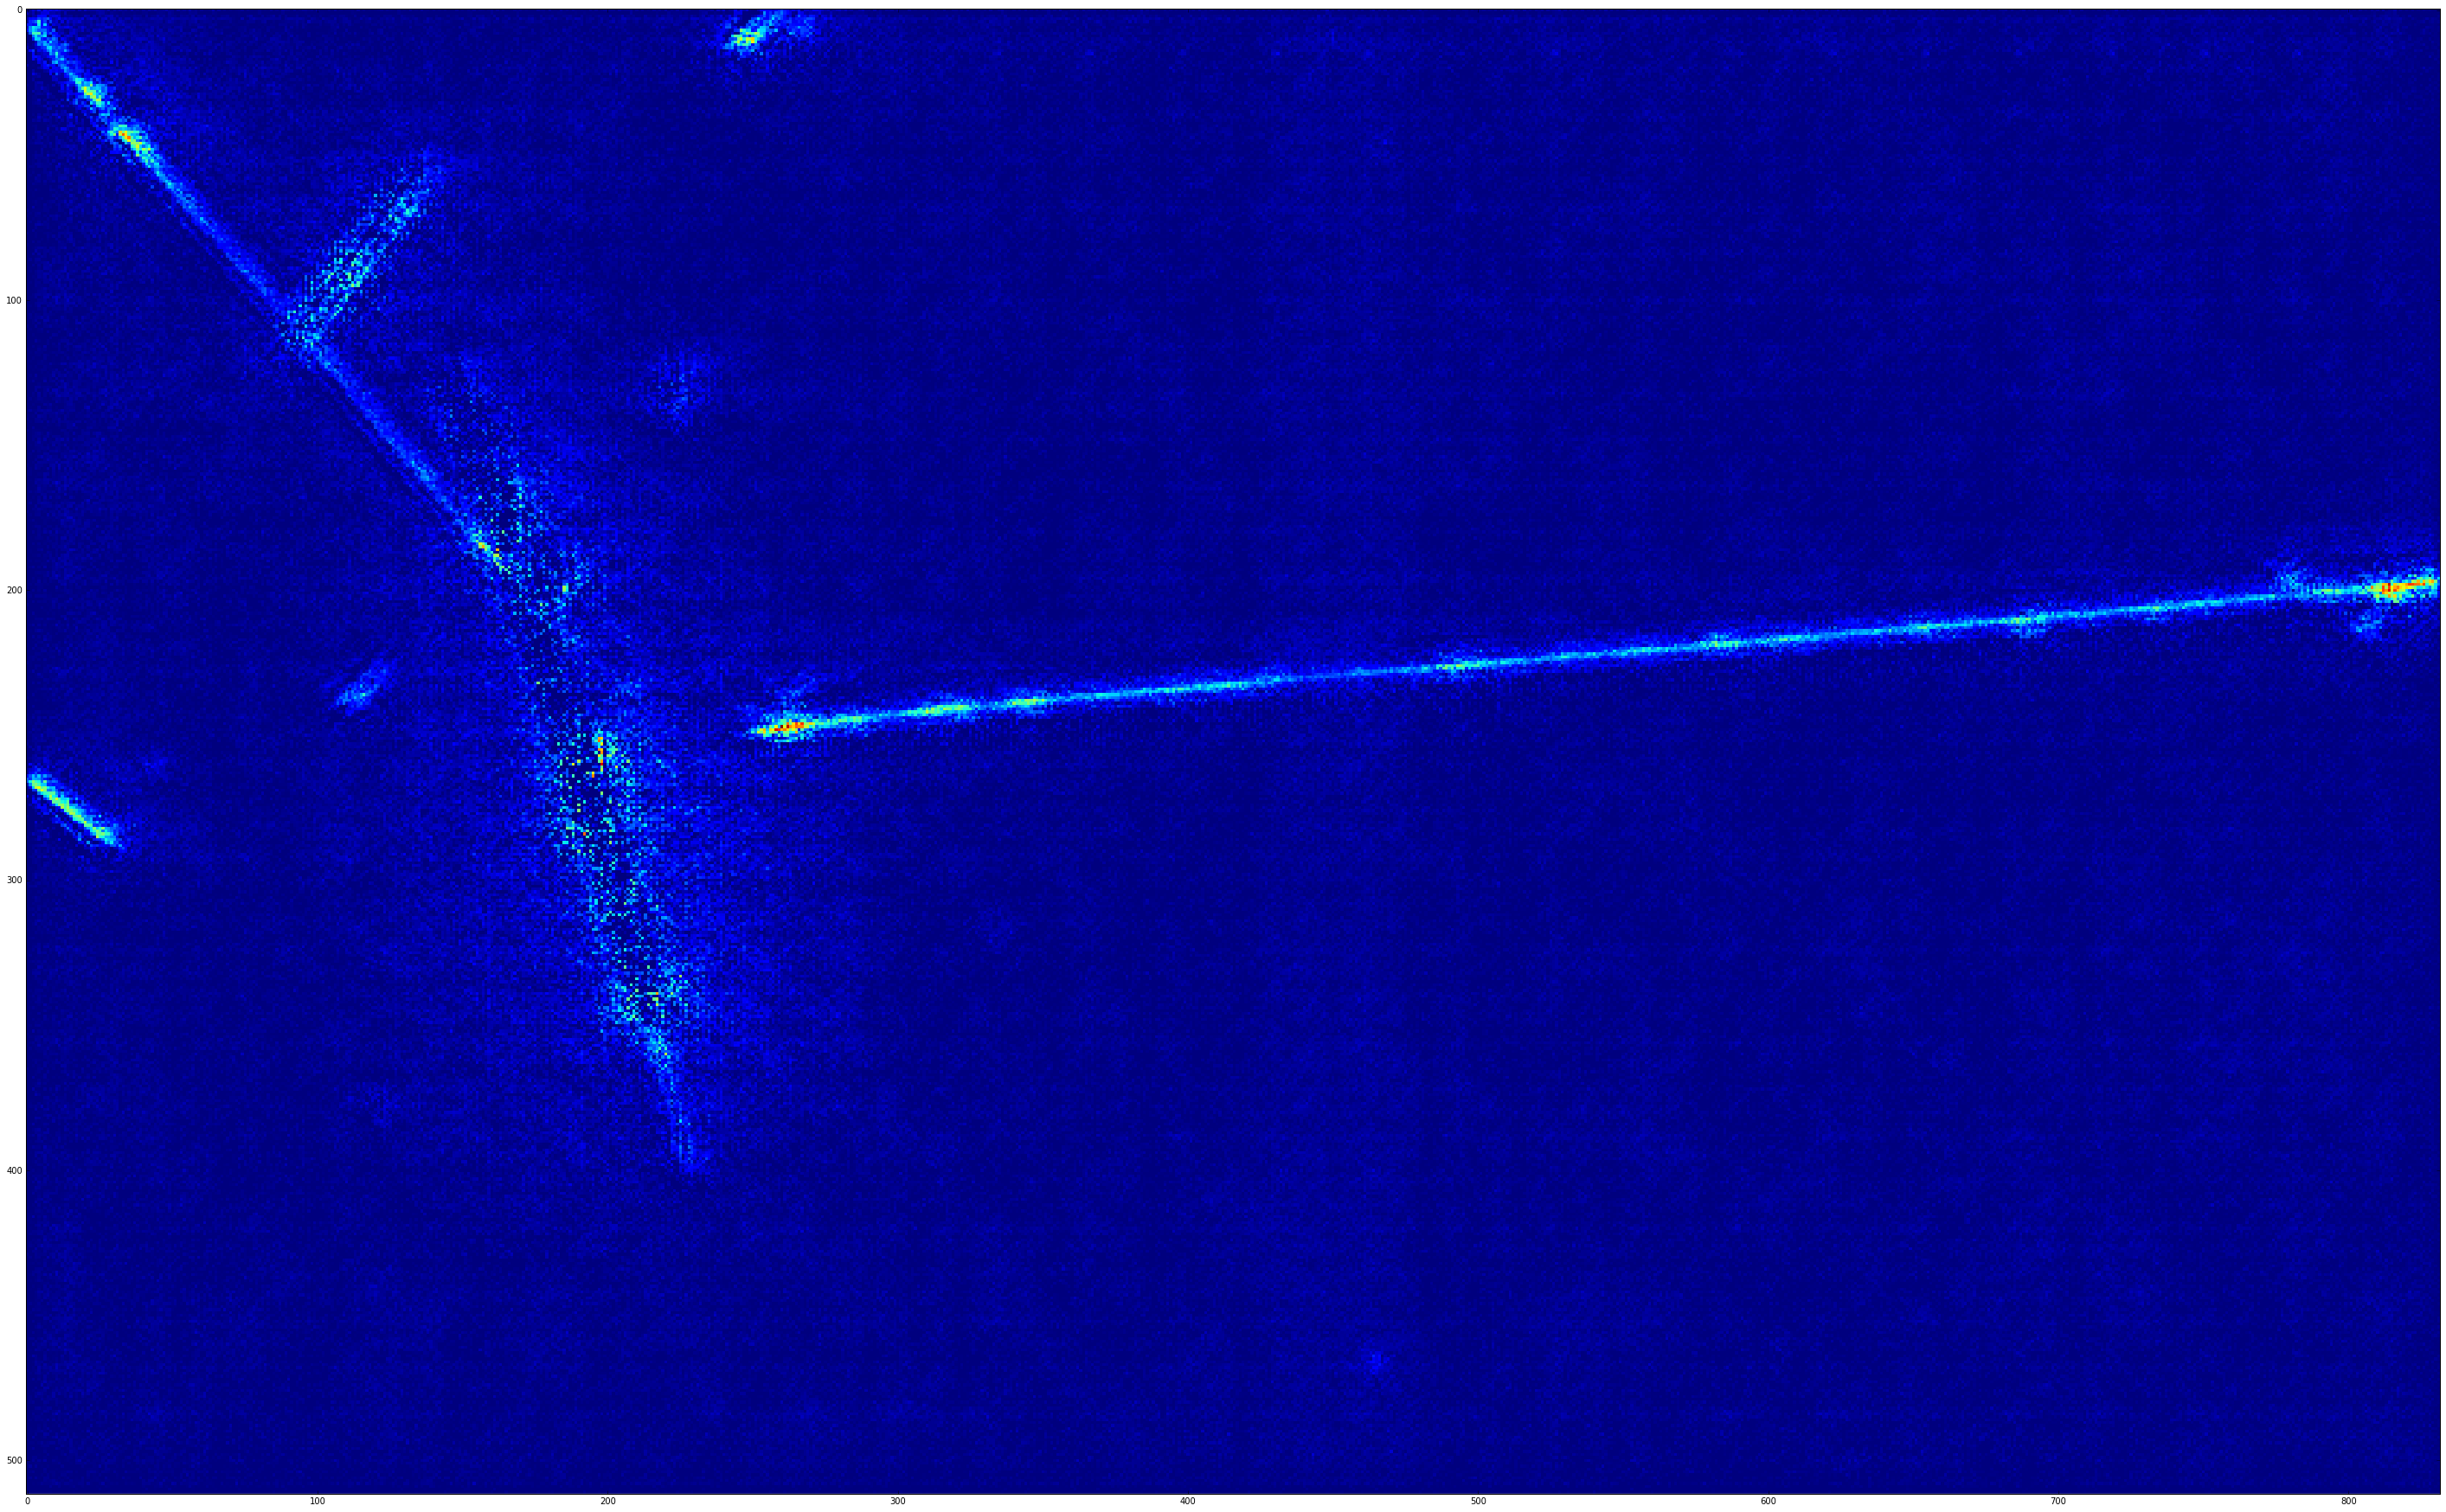

TFile**		output_infill100.root	
 TFile*		output_infill100.root	
  KEY: TTree	image2d_ADCMasked_tree;1	ADCMasked tree
  KEY: TTree	image2d_ADC_tree;1	ADC tree
  KEY: TTree	image2d_LabelsBasic_tree;1	LabelsBasic tree
  KEY: TTree	image2d_out_tree;1	out tree
  KEY: TTree	image2d_acc_tree;1	acc tree
